# Q.1

In [3]:
import tensorflow as tf
import keras

import warnings
warnings.filterwarnings('ignore')

print(f"Tensorflow Version:{tf.__version__}")
print(f"Keras Version:{keras.__version__}")

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Tensorflow Version:2.13.0
Keras Version:2.13.1


# Q.2

In [6]:
import pandas as pd

df=pd.read_csv('wine.csv')
df.shape

(1599, 12)

# Q.3

In [7]:
#check for null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
#Identifying categorical variables
categorical_col=df.select_dtypes(include=['object','category'])
categorical_col_names=list(categorical_col.columns) #including the quality column
print(categorical_col_names)
print(df[categorical_col_names].value_counts())

['quality']
quality
good       855
bad        744
dtype: int64


In [13]:
#Encoding Categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df[categorical_col_names[0]]=label_encoder.fit_transform(df[categorical_col_names[0]])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Q.4

In [18]:
y=df.pop('quality')
x=df

# Q.5

In [20]:
#Performing train-test split and dividing data into training, validation, and test datasets.

from sklearn.model_selection import train_test_split

#split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("Training set size:", x_train.shape[0])
print("Validation set size:", x_val.shape[0])
print("Test set size:", x_test.shape[0])

Training set size: 1023
Validation set size: 256
Test set size: 320


# Q.6

In [21]:
#Perform scaling on the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Q.7 and Q.8

In [22]:
#creating two hidden layers, output layer and Sequential Model

input_shape = (x_train_scaled.shape[1],)

model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=input_shape))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Q.9

In [23]:
#Implement a TensorBoard callback to visualize and monitor the model's training process.

tensorboard_callback = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)

# Q.10

In [24]:
#Using Early Stopping to prevent overfitting

early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Q.11

In [25]:
#Implement a ModelCheckpoint callback to save the best model 

checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

# Q.12

In [26]:
#Printing Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q.13 and Q.14

In [27]:
#Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
#Compile the model with the specified loss function, optimizer, and metrics.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Q.15

In [28]:
#Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

model.fit(x_train_scaled, y_train, batch_size=32, epochs=30, validation_data=(x_val_scaled, y_val), callbacks=[early_stopping_callback,checkpoint_callback])

Epoch 1/30
32/32 [==============================] - 2s 15ms/step - loss: 0.6698 - accuracy: 0.5640 - val_loss: 0.6376 - val_accuracy: 0.6562
Epoch 2/30
32/32 [==============================] - 0s 6ms/step - loss: 0.5826 - accuracy: 0.7155 - val_loss: 0.5949 - val_accuracy: 0.7188
Epoch 3/30
32/32 [==============================] - 0s 6ms/step - loss: 0.5363 - accuracy: 0.7361 - val_loss: 0.5698 - val_accuracy: 0.7539
Epoch 4/30
32/32 [==============================] - 0s 5ms/step - loss: 0.5151 - accuracy: 0.7429 - val_loss: 0.5663 - val_accuracy: 0.7695
Epoch 5/30
32/32 [==============================] - 0s 5ms/step - loss: 0.5025 - accuracy: 0.7449 - val_loss: 0.5541 - val_accuracy: 0.7656
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 0.4935 - accuracy: 0.7507 - val_loss: 0.5544 - val_accuracy: 0.7695
Epoch 7/30
32/32 [==============================] - 0s 5ms/step - loss: 0.4873 - accuracy: 0.7586 - val_loss: 0.5517 - val_accuracy: 0.7734
Epoch 8/30
32/32 [=

# Q.16

In [29]:
#Get the model parameters.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Q.17

In [30]:
#Store the model's training history as a Pandas DataFrame.
history = pd.DataFrame(model.history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.669818,0.564027,0.637646,0.656250
1,0.582553,0.715542,0.594900,0.718750
2,0.536303,0.736070,0.569778,0.753906
3,0.515106,0.742913,0.566327,0.769531
4,0.502489,0.744868,0.554092,0.765625
5,0.493475,0.750733,0.554445,0.769531
6,0.487296,0.758553,0.551728,0.773438
7,0.481960,0.760508,0.551628,0.769531
8,0.477456,0.764418,0.553080,0.769531
9,0.472749,0.765396,0.546337,0.781250


# Q.18

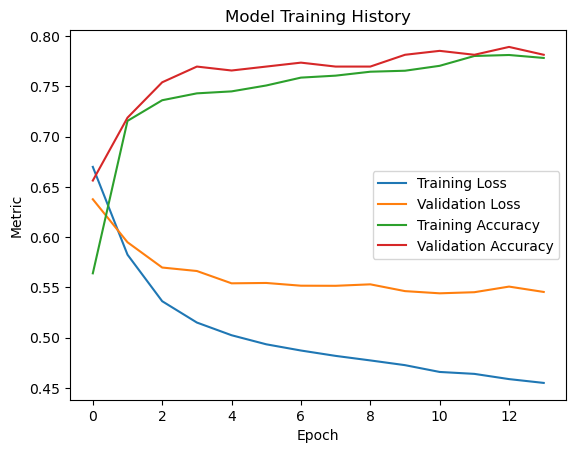

In [31]:
#Plot the model's training history.

import matplotlib.pyplot as plt

plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Model Training History')
plt.legend()
plt.show()

# Q.19

In [32]:
#Evaluate the model's performance using the test data.

loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

10/10 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.7500
Test Loss: 0.5019925832748413
Test Accuracy: 0.75
